<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/Market_Association_Grocery_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grocery Data Analysis**
### Market Association

## Data Prepartion

### Setup 

#### Imports

In [1]:
# Imports
import json
import zipfile
import os
from collections import Counter
import pandas as pd
from itertools import combinations

### Cofiguring Kaggle, Downloading and Extracting Dataset

In [2]:
!pip install kaggle
api_token = {"username":"ayushxx7","key":"32c5490ba78a5c6e8eaa81a18380c7dd"}
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d heeraldedhia/groceries-dataset

for file in os.listdir():
    if '.zip' in file:
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

kaggle.json
  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 39.9MB/s]


In [3]:
df = pd.read_csv('Groceries_dataset.csv')
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Find out items that are frequenty bought together
- Group by customer ID and date
 - Find max count (which items are most associated)
 - remove outliers

### To analyze the frequency of items that are purchased/sold together

- Create a mapping for how many items each ,member purchased on any particular day

In [23]:
date_item = {}
for index, row in df.iterrows():
  # print(row[0], row[1], row[2])
  member = row[0]
  date = row[1]
  item = row[2]
  if (member, date) in date_item:
    date_item[(member, date)].append(item)
  else:
    date_item[(member, date)] = [item]
print(date_item)

{(1808, '21-07-2015'): ['tropical fruit', 'rolls/buns', 'candy'], (2552, '05-01-2015'): ['whole milk', 'tropical fruit', 'chocolate'], (2300, '19-09-2015'): ['pip fruit', 'other vegetables', 'flour'], (1187, '12-12-2015'): ['other vegetables', 'onions', 'shopping bags'], (3037, '01-02-2015'): ['whole milk', 'other vegetables', 'white bread'], (4941, '14-02-2015'): ['rolls/buns', 'citrus fruit', 'fruit/vegetable juice'], (4501, '08-05-2015'): ['other vegetables', 'bottled water', 'shopping bags'], (3803, '23-12-2015'): ['pot plants', 'citrus fruit', 'whipped/sour cream'], (2762, '20-03-2015'): ['whole milk', 'specialty bar', 'newspapers'], (4119, '12-02-2015'): ['tropical fruit', 'citrus fruit', 'soda'], (1340, '24-02-2015'): ['citrus fruit', 'rolls/buns', 'pastry'], (2193, '14-04-2015'): ['beef', 'bottled beer', 'specialty chocolate', 'yogurt', 'whole milk'], (1997, '21-07-2015'): ['frankfurter', 'soda', 'canned beer', 'white bread', 'brown bread'], (4546, '03-09-2015'): ['chicken', 't

- Once the mapping is generated, sort the values in each list (Preparing data for comparison)

In [32]:
for key, mapping in date_item.items():
  mapping.sort()
print(date_item)

{(1808, '21-07-2015'): ['candy', 'rolls/buns', 'tropical fruit'], (2552, '05-01-2015'): ['chocolate', 'tropical fruit', 'whole milk'], (2300, '19-09-2015'): ['flour', 'other vegetables', 'pip fruit'], (1187, '12-12-2015'): ['onions', 'other vegetables', 'shopping bags'], (3037, '01-02-2015'): ['other vegetables', 'white bread', 'whole milk'], (4941, '14-02-2015'): ['citrus fruit', 'fruit/vegetable juice', 'rolls/buns'], (4501, '08-05-2015'): ['bottled water', 'other vegetables', 'shopping bags'], (3803, '23-12-2015'): ['citrus fruit', 'pot plants', 'whipped/sour cream'], (2762, '20-03-2015'): ['newspapers', 'specialty bar', 'whole milk'], (4119, '12-02-2015'): ['citrus fruit', 'soda', 'tropical fruit'], (1340, '24-02-2015'): ['citrus fruit', 'pastry', 'rolls/buns'], (2193, '14-04-2015'): ['beef', 'bottled beer', 'specialty chocolate', 'whole milk', 'yogurt'], (1997, '21-07-2015'): ['brown bread', 'canned beer', 'frankfurter', 'soda', 'white bread'], (4546, '03-09-2015'): ['brown bread'

- Since member number and date have no relevant once the grouping is complete, we can drop these values. 
- In other words, we can create a list of sublists containing only the item combinations.

In [37]:
list_of_list = []
for key, mapping in date_item.items():
  list_of_list.append(mapping)

- Convert the list of list to tuple, so that Counter can be applied to it

In [65]:
converted_to_tuple = map(tuple, list_of_list)
counter_obj = Counter(converted_to_tuple)
print("The top 5 most common combinations:")
for key, value in counter_obj.most_common(5):
  print(key, 'combination was bought', value, 'times')

The top 5 most common combinations:
('other vegetables', 'whole milk') combination was bought 85 times
('rolls/buns', 'whole milk') combination was bought 54 times
('other vegetables', 'rolls/buns') combination was bought 50 times
('other vegetables', 'soda') combination was bought 49 times
('soda', 'whole milk') combination was bought 46 times


In [71]:
item_pair = []
for key, mapping in date_item.items():
  item_pair.append(list(combinations(mapping, 2)))

In [76]:
item_pair[0]
for item_combo in item_pair[0]:
  print(item_combo)

('candy', 'rolls/buns')
('candy', 'tropical fruit')
('rolls/buns', 'tropical fruit')


In [72]:
print(item_pair)
# converted_to_tuple = map(tuple, item_pair)
# counter_obj = Counter(converted_to_tuple)
# print("The top 5 most common combinations:")
# for key, value in counter_obj.most_common(5):
#   print(key, 'combination was bought', value, 'times')

[[('candy', 'rolls/buns'), ('candy', 'tropical fruit'), ('rolls/buns', 'tropical fruit')], [('chocolate', 'tropical fruit'), ('chocolate', 'whole milk'), ('tropical fruit', 'whole milk')], [('flour', 'other vegetables'), ('flour', 'pip fruit'), ('other vegetables', 'pip fruit')], [('onions', 'other vegetables'), ('onions', 'shopping bags'), ('other vegetables', 'shopping bags')], [('other vegetables', 'white bread'), ('other vegetables', 'whole milk'), ('white bread', 'whole milk')], [('citrus fruit', 'fruit/vegetable juice'), ('citrus fruit', 'rolls/buns'), ('fruit/vegetable juice', 'rolls/buns')], [('bottled water', 'other vegetables'), ('bottled water', 'shopping bags'), ('other vegetables', 'shopping bags')], [('citrus fruit', 'pot plants'), ('citrus fruit', 'whipped/sour cream'), ('pot plants', 'whipped/sour cream')], [('newspapers', 'specialty bar'), ('newspapers', 'whole milk'), ('specialty bar', 'whole milk')], [('citrus fruit', 'soda'), ('citrus fruit', 'tropical fruit'), ('so

### Find out which items are most popular (value_counts)

In [7]:
# Checking whether any incorrect value is present
for item in df.itemDescription.unique():
  print(item)

tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
pot plants
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese 
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
fro

In [8]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

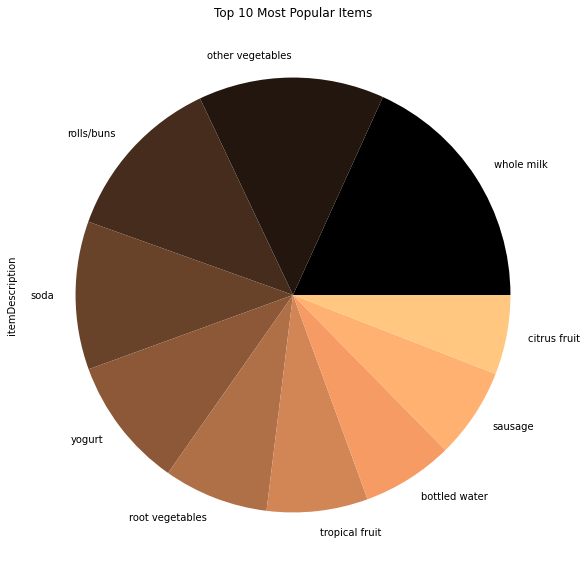

In [9]:
df.itemDescription.value_counts()[:10].plot(kind='pie', figsize=(10,10), colormap='copper', title="Top 10 Most Popular Items")

The most selling product is `Whole Milk` (sold 2500+).

### Find out customers that are most loyal


In [10]:
df.Member_number.value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

In [11]:
df[['Member_number', 'Date']].groupby(by=['Member_number', 'Date']).size()

Member_number  Date      
1000           15-03-2015    4
               24-06-2014    3
               24-07-2015    2
               25-11-2015    2
               27-05-2015    2
                            ..
4999           24-01-2015    6
               26-12-2015    2
5000           09-03-2014    2
               10-02-2015    3
               16-11-2014    2
Length: 14963, dtype: int64

In [12]:
df.groupby(['Member_number', 'Date']).size().reset_index(name='counts')

,Member_number,Date,counts
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2
...,...,...,...
14958,4999,24-01-2015,6
14959,4999,26-12-2015,2
14960,5000,09-03-2014,2
14961,5000,10-02-2015,3


In [13]:
new_df = df.groupby(['Member_number', 'Date']).size().reset_index(name='counts')
new_df.head()

,Member_number,Date,counts
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2


In [14]:
for key in new_df:
  print(key)

Member_number
Date
counts


In [15]:
most_loyal_df = new_df.groupby(['Member_number']).count()
max_count = new_df.groupby(['Member_number']).count().max()[0]
most_loyal = most_loyal_df.loc[most_loyal_df['counts'] == max_count]

In [16]:
print(f"There are {len(most_loyal)} loyal customers")
print("The following are their member IDs")
for index, member in most_loyal.iterrows():
  print(index)
print("All of them made a purchase on", max_count, "unique days")

There are 5 loyal customers
The following are their member IDs
1379
2193
2271
3737
4338
All of them made a purchase on 11 unique days


In [17]:
grouped_df = df.groupby(['Member_number']).size().reset_index(name="count")
print(grouped_df)
df2 = grouped_df.loc[grouped_df['Member_number'].isin([1379, 2193, 2271, 3737, 4338])]

      Member_number  count
0              1000     13
1              1001     12
2              1002      8
3              1003      8
4              1004     21
...             ...    ...
3893           4996     10
3894           4997      6
3895           4998      2
3896           4999     16
3897           5000      7

[3898 rows x 2 columns]


In [18]:
df3 = df2.sort_values(by=['count'], ascending=False)
print(df3)

      Member_number  count
2665           3737     33
1234           2271     31
369            1379     28
3250           4338     28
1159           2193     27


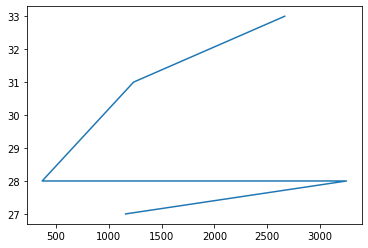

In [19]:
df3['count'].plot(kind="line")

Among the most loyal people, we found that Customer Number: 2665, made the most purchases (33). Hence, `2665` is the most valuable customer for the shop.

## References
- [Download dataset from Kaggle](https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27#gistcomment-3509158)
- [How to plot value_counts](https://mode.com/python-tutorial/counting-and-plotting-in-python/#visualizing-data-with-plot)
- [Colorscheme](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
- [Pandas documentation for Plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [Group data based on multiple columns](https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby)
- [Generate count dataframe over a column](https://www.geeksforgeeks.org/getting-frequency-counts-of-a-columns-in-pandas-dataframe/)
- [Filter out dataframe rows based on column values](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)
- [In-built method - Sorted](https://docs.python.org/3/howto/sorting.html)
- [Sort vs Sorted](https://discuss.codecademy.com/t/what-is-the-difference-between-sort-and-sorted/349679)
- [How to run Counter on list of list](https://stackoverflow.com/questions/45019607/count-occurrence-of-a-list-in-a-list-of-lists)